# Dark Test Analysis

## Setup Code (run before plotting)

In [1]:
# preparatory work
import utils
import pandas as pd

# set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# make plots pretty
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.4)
sns.set_palette("Set2")

## Load data

In [2]:
### FILE LOCATION
datafile_path = 'data/darktest.tsv'

df = pd.DataFrame.from_csv(datafile_path, sep='\t') # load .tsv into dataframe

## Clean and normalize data

In [3]:
df = utils.prepdata(df) # run preparations

# offtimes are the times that the screen went off in sec
# strings specify which columns to grab and convert
df = utils.timestamp_to_seconds(df, 'ontime', 'offtimes') 

## Split data around events of interest

In [4]:
# PARAMETERS
tpre = -0.3
tpost = 8

chunklist, idx = utils.evtsplit(df, df['offtimes'], tpre, tpost)

norm_data = utils.basenorm(chunklist, idx, [float('-inf'), 0], 0)

norm_pupil = norm_data[idx.get_loc('MeanPupil')]

## Plot

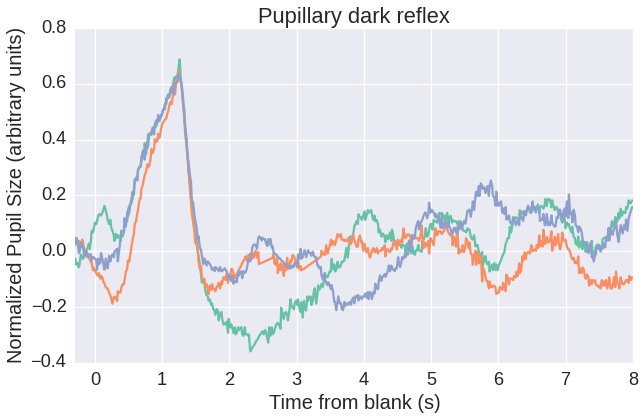

In [5]:
plt.figure(figsize=(10,6))

plt.plot(norm_pupil.index, norm_pupil);
plt.xlim([tpre, tpost])
plt.title('Pupillary dark reflex');
plt.ylabel('Normalized Pupil Size (arbitrary units)');
plt.xlabel('Time from blank (s)');

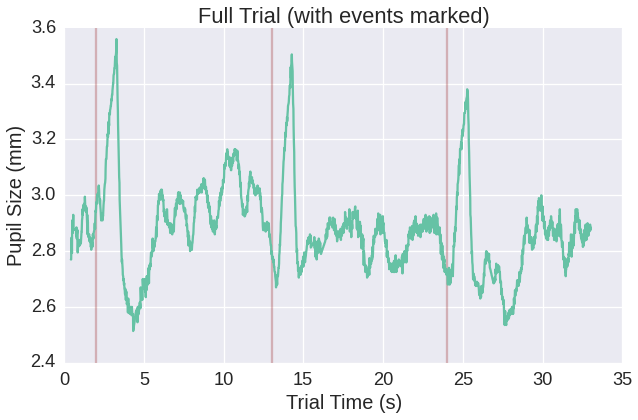

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['MeanPupil']);
plt.ylim([2.4, 3.6])
plt.plot((2.006, 2.006), (2.4, 3.6), 'darkred', zorder=1, alpha=0.25)
plt.plot((13.017, 13.017), (2.4, 3.6), 'darkred', zorder=1, alpha=0.25)
plt.plot((24.028, 24.028), (2.4, 3.6), 'darkred', zorder=1, alpha=0.25)
plt.title('Full Trial (with events marked)');
plt.ylabel('Pupil Size (mm)');
plt.xlabel('Trial Time (s)');